<a href="https://colab.research.google.com/github/hasanzeynal/TensorFlow-Developer-Certificate/blob/main/Exercises/%F0%9F%9B%A0%EF%B8%8F_03_computer_vision_and_convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's repeat all our acknowledges in Computer Vision and Multiclass Classification Model.
* Import Dataset from TnesorFlow Datasets
* Explore Images
* Prepare Dataset
* Create **Multiclass Classification** model on cifar 10 Datasets
* Create at least 1 *Non CNN model* and *2 CNN Model*
* Get Visualizations of **Loss** and **Accuracy**.
* Make the predictions with Pictures
* Finding ideal learning rate
* Create last CNN model with **Ideal Learning Rate**



In [ ]:
#import libraries
import os
import time
import random
import zipfile
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow_datasets.public_api as tfds

#ignore all warnings
import warnings
warnings.filterwarnings(action ='ignore')



In [ ]:
pip install tensorflow_datasets

In [ ]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 17s 0us/step


In [ ]:
#getting class names

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
def view_random_image():
  i = random.sample(list(range(0,49999)),1)[0]
  plt.imshow(X_train[i])
  plt.title(class_names[y_train[i][0]])
  plt.xticks([])
  plt.yticks([])
  print(X_train[i].shape)
  plt.show()

(32, 32, 3)


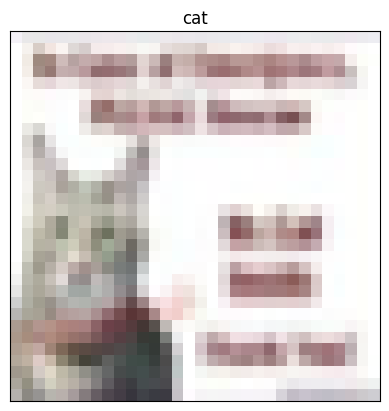

In [ ]:
view_random_image()

(32, 32, 3)


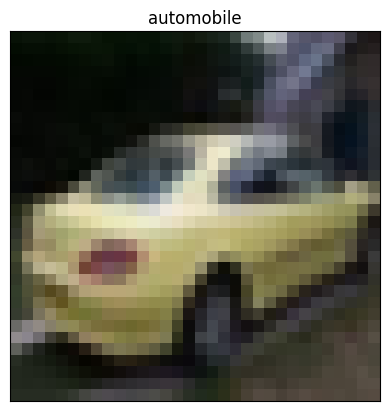

In [ ]:
view_random_image()

(32, 32, 3)


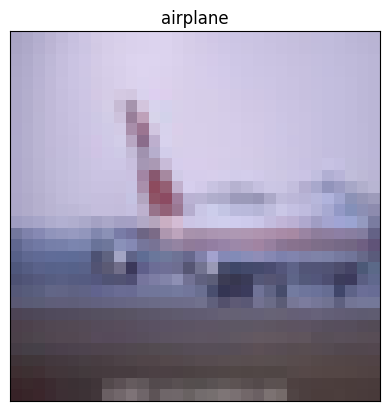

In [ ]:
view_random_image()

In [ ]:
#looking for shapes
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
#creating definition to view accuracy and loss metric
def plot_metrics(history):
  pd.DataFrame(history.history).plot()
  plt.show()

## Non CNN Model

In [ ]:
# Creating first Non CNN Model

# set the random seed
tf.random.set_seed(42)

#creating a architecture
non_cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

#compile the model
non_cnn_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(),
                      metrics = ['accuracy'])

#fit the model
non_cnn_model_history = non_cnn_model.fit(X_train,
                                          y_train,
                                          epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 7s 3ms/step - loss: 9.9265 - accuracy: 0.1361
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3018 - accuracy: 0.1004
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3024 - accuracy: 0.0988
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0989
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0992


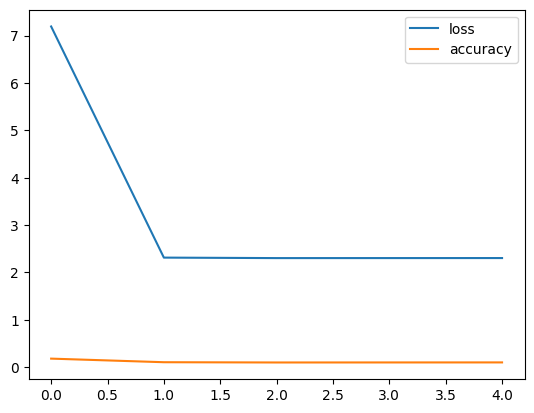

In [ ]:
plot_metrics(non_cnn_model_history)

## First CNN Model

In [ ]:
#creating a model

#set the random seed
tf.random.set_seed(42)

#model architecture as tinyvggnet
cnn_model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, input_shape=(32,32,3) ,activation = 'relu'),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 3),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation = 'relu'),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

#compile the model
cnn_model_1.compile(loss = 'sparse_categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

#fit the model
cnn_model_1_history = cnn_model_1.fit(X_train,
                                      y_train,
                                      epochs = 10,
                                      validation_data = (X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 2.4186 - accuracy: 0.1238 - val_loss: 2.2671 - val_accuracy: 0.1363
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0741 - accuracy: 0.2227 - val_loss: 1.9167 - val_accuracy: 0.2800
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8687 - accuracy: 0.2950 - val_loss: 1.7969 - val_accuracy: 0.3256
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7709 - accuracy: 0.3346 - val_loss: 1.7509 - val_accuracy: 0.3538
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7034 - accuracy: 0.3640 - val_loss: 1.6923 - val_accuracy: 0.3761
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6575 - accuracy: 0.3831 - val_loss: 1.6207 - val_accuracy: 0.3989
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6134 - accuracy: 0.4022 - val_loss: 1.6281 - val_accuracy

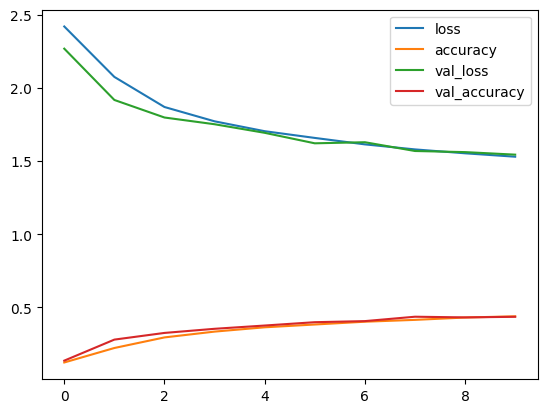

In [ ]:
#view the plot for cnn_model_1
plot_metrics(cnn_model_1_history)

## CNN Model 2 on Normalized Data

In [ ]:
#normalize data before training
normalized_X_train = X_train / 255
normalized_y_train = y_train / 255

#set the random seed
tf.random.set_seed(42)

#create model architecture
cnn_model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10, 3, input_shape=(32, 32, 3), activation= 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation= 'relu'),
    tf.keras.layers.MaxPool2D(pool_size= (3,3)),
    tf.keras.layers.Conv2D(10, 3, activation= 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation= 'relu'),
    tf.keras.layers.MaxPool2D(pool_size= (3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation= 'softmax')
])

#compile the model
cnn_model_2.compile(loss= 'sparse_categorical_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

#fit the model
cnn_model_2_history = cnn_model_2.fit(normalized_X_train,
                                      normalized_y_train,
                                      epochs = 10,
                                      validation_data= (X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 0.0603 - accuracy: 0.0967 - val_loss: 7380.7383 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9690e-06 - accuracy: 0.1000 - val_loss: 8335.3604 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 5.8229e-07 - accuracy: 0.1000 - val_loss: 9175.3779 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.1279e-07 - accuracy: 0.1000 - val_loss: 9709.0791 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 9.6264e-08 - accuracy: 0.1000 - val_loss: 10485.2246 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 3.3346e-08 - accuracy: 0.1000 - val_loss: 11085.4336 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3324e-08 - accura